<a href="https://colab.research.google.com/github/RAYANSLIM001KENYA/PHASE-3-THREE-END-PROJECT/blob/main/PHASE3_PROJECT_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# TITTLE: CUSTOMER PURCHASE BEHAVIOR PREDICTION IN OPTIMIZING STRATEGIES OF THE MARKETING
---

## INTODUCTION
In this project, i intend to solve a classification problem using the dataset bigml_59c28831336c6604c800002a.csv. This project represents a full exploration of the data science lifecycle, including problem framing, data preparation, model building, evaluation, and interpretation of results. The ultimate goal is to build a predictive model that addresses a business problem effectively.

## BUSINESS CONTEXT
The dataset provides information about various entities, with features capturing relevant characteristics and a target variable that categorizes outcomes into specific classes. This project focuses on leveraging machine learning techniques to classify entities into these target categories accurately.

## BUSINESS PROBLEM
The core business problem revolves around predicting the target category based on the feature set. Accurate classification can help stakeholders make informed decisions, optimize operations, or address critical issues such as risk mitigation or opportunity identification.

## OBJECTIVES
- Build Predictive Models: Train and evaluate three classification models (Logistic Regression, Decision Tree, and Random Forest) to identify the best-performing model.
- Maximize Performance: Use appropriate classification metrics (e.g., precision, recall, F1-score, ROC-AUC) to evaluate and improve model performance, ensuring predictions align with business needs.
- Feature Analysis: Identify the most important features influencing the target variable to provide actionable insights for business stakeholders.
- Iterative Modeling: Demonstrate an iterative approach by refining models through hyperparameter tuning, preprocessing strategies, and performance evaluation.

### Key Points
- This is a classification problem where the target variable represents categorical outcomes.
- The project emphasizes interpretability and actionable recommendations based on the results of machine learning models.
- Models will be evaluated using both training and testing datasets, with appropriate measures taken to avoid data leakage and ensure robustness.

### Scope
The findings from this project are expected to provide the following:

- A clear understanding of the predictive power of the dataset.
- Actionable insights based on feature importance and model predictions.
- Recommendations for implementing the model in a real-world scenario to address the business problem effectively.

## Dataset Loading and Inspection
---

In [ ]:
# libraries importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.datasets import load_iris

In [ ]:
# dataset loading
data_path = 'bigml_59c28831336c6604c800002a.csv'
data = pd.read_csv(data_path)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
# Displaying basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

Dataset Shape: (3333, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14 

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


## Exploratory Data Analysis
---

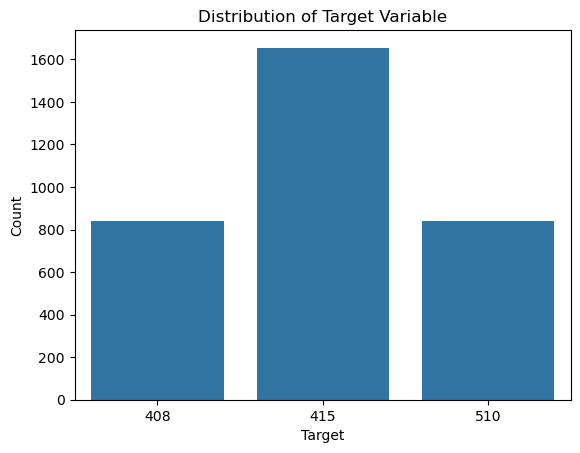

In [ ]:
# Visualizing the distribution of the target variable
sns.countplot(x='area code', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

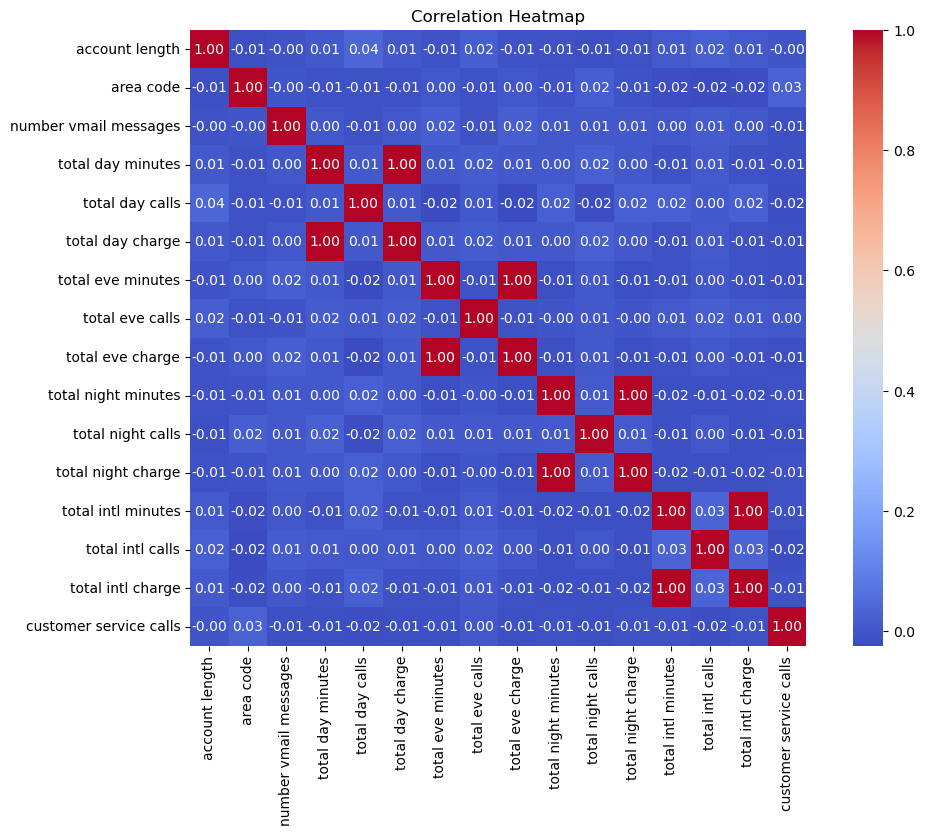

In [ ]:
# Selecting only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculating and ploting the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#dropping the duplicates if there could be any existing
data = data.drop_duplicates()
print("Duplicate rows removed. New dataset shape:", data.shape)


Duplicate rows removed. New dataset shape: (3333, 21)


In [ ]:
#bolding the columns tittles
data.columns = map(lambda x: str(x).upper(), data.columns)
data.head()

,STATE,ACCOUNT LENGTH,AREA CODE,PHONE NUMBER,INTERNATIONAL PLAN,VOICE MAIL PLAN,NUMBER VMAIL MESSAGES,TOTAL DAY MINUTES,TOTAL DAY CALLS,TOTAL DAY CHARGE,...,TOTAL EVE CALLS,TOTAL EVE CHARGE,TOTAL NIGHT MINUTES,TOTAL NIGHT CALLS,TOTAL NIGHT CHARGE,TOTAL INTL MINUTES,TOTAL INTL CALLS,TOTAL INTL CHARGE,CUSTOMER SERVICE CALLS,CHURN
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Model Training
---

In [ ]:
# Encoding categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

In [ ]:
# Spliting the data into features and target
X = data.drop(columns=[target_column])
y = data[target_column]

In [ ]:
print(X)

      STATE  ACCOUNT LENGTH  PHONE NUMBER  INTERNATIONAL PLAN  \
0        16             128          1926                   0   
1        35             107          1575                   0   
2        31             137          1117                   0   
3        35              84          1707                   1   
4        36              75           110                   1   
...     ...             ...           ...                 ...   
3328      3             192          3057                   0   
3329     49              68          1528                   0   
3330     39              28            42                   0   
3331      6             184          1331                   1   
3332     42              74          2559                   0   

      VOICE MAIL PLAN  NUMBER VMAIL MESSAGES  TOTAL DAY MINUTES  \
0                   1                     25              265.1   
1                   1                     26              161.6   
2                 

In [ ]:
print(y)

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: AREA CODE, Length: 3333, dtype: int64


In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Creating a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Creating a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

      STATE  ACCOUNT LENGTH  PHONE NUMBER  INTERNATIONAL PLAN  \
817      44             243          1041                   0   
1373     40             108          2528                   0   
679      43              75          1988                   1   
56        5             141           465                   0   
1993     15              86          1108                   0   
...     ...             ...           ...                 ...   
1095     13             106          1954                   0   
1130     38             122          1228                   0   
1294     37              66           763                   0   
860      11             169           249                   0   
3174     40              36          1156                   0   

      VOICE MAIL PLAN  NUMBER VMAIL MESSAGES  TOTAL DAY MINUTES  \
817                 0                      0               95.5   
1373                0                      0              112.0   
679               

In [ ]:
print(X_test)

      STATE  ACCOUNT LENGTH  PHONE NUMBER  INTERNATIONAL PLAN  \
438      50             113           904                   0   
2674     14              67          1495                   0   
1345     41              98          2268                   0   
1957     17             147          2416                   0   
2148     50              96            53                   0   
...     ...             ...           ...                 ...   
2577     23             157          1600                   0   
2763     27             116           406                   0   
3069     15             148          1562                   0   
1468     35              75          1588                   0   
582      32             104          1072                   0   

      VOICE MAIL PLAN  NUMBER VMAIL MESSAGES  TOTAL DAY MINUTES  \
438                 0                      0              155.0   
2674                0                      0              109.1   
1345              

In [ ]:
print(y_test)

438     510
2674    415
1345    415
1957    408
2148    408
       ... 
2577    510
2763    408
3069    415
1468    510
582     415
Name: AREA CODE, Length: 667, dtype: int64


In [ ]:
print(y_train)

817     510
1373    415
679     415
56      415
1993    510
       ... 
1095    510
1130    415
1294    408
860     415
3174    408
Name: AREA CODE, Length: 2666, dtype: int64


In [ ]:
# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. logistic regresion model

In [ ]:
# Training Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

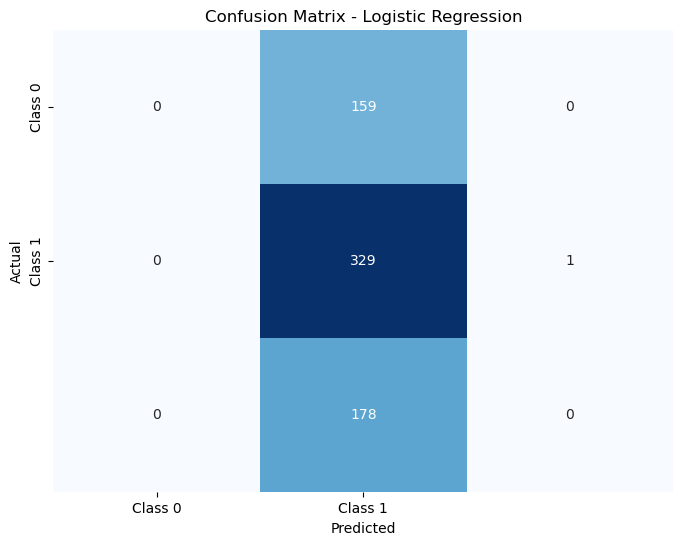

In [ ]:
# Generating Confusion Matrix
conf_matrix = confusion_matrix(y_test, log_reg_pred)

# Ploting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

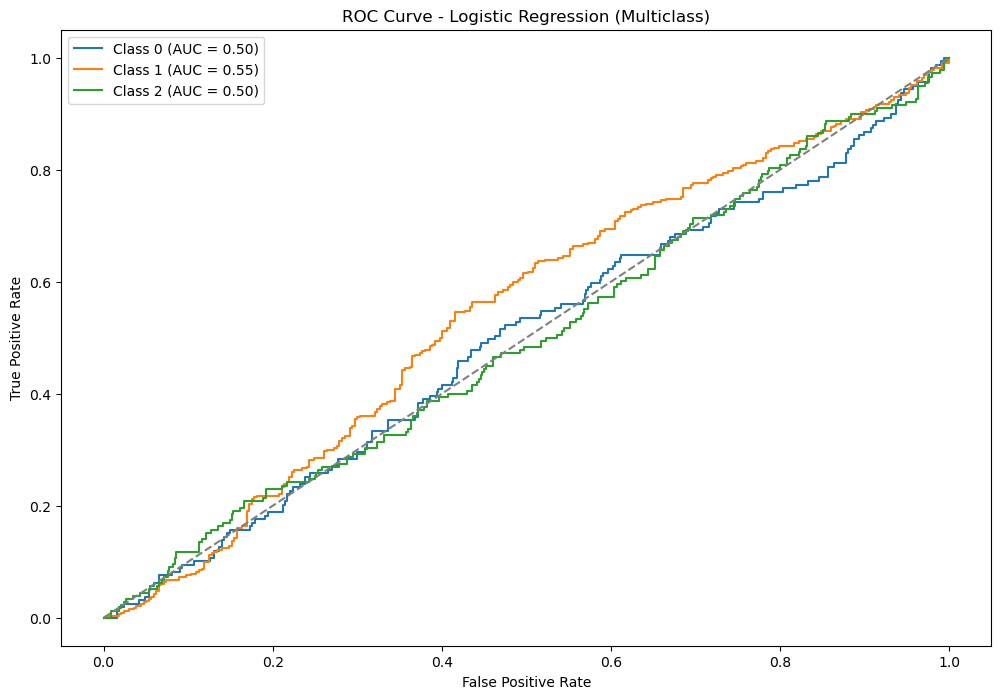

In [ ]:
# Binarizing the target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=log_reg.classes_)
n_classes = y_test_bin.shape[1]

# Predicting probabilities
log_reg_proba = log_reg.predict_proba(X_test)

# Ploting ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], log_reg_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

# Add baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve - Logistic Regression (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Generate the classification report
report = classification_report(y_test, log_reg_pred)
print("Classification Report for Logistic Regression:\n", report)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         408       0.00      0.00      0.00       159
         415       0.49      1.00      0.66       330
         510       0.00      0.00      0.00       178

    accuracy                           0.49       667
   macro avg       0.16      0.33      0.22       667
weighted avg       0.24      0.49      0.33       667



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 2. Decision Tree Model

In [ ]:
# Training Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

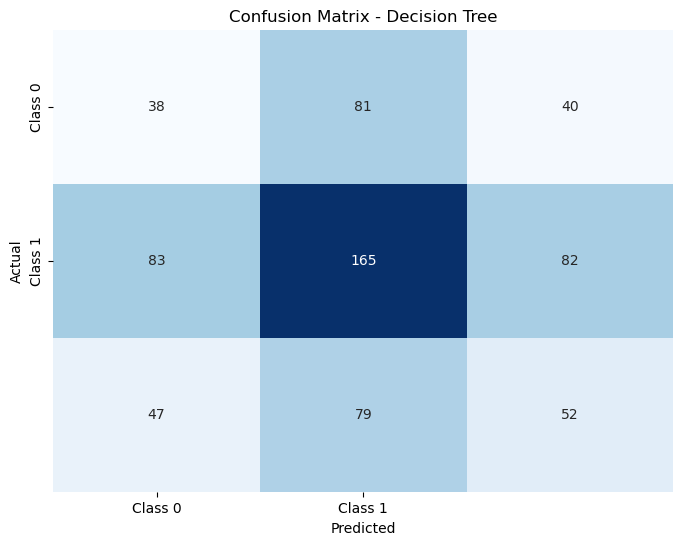

In [ ]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, dt_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

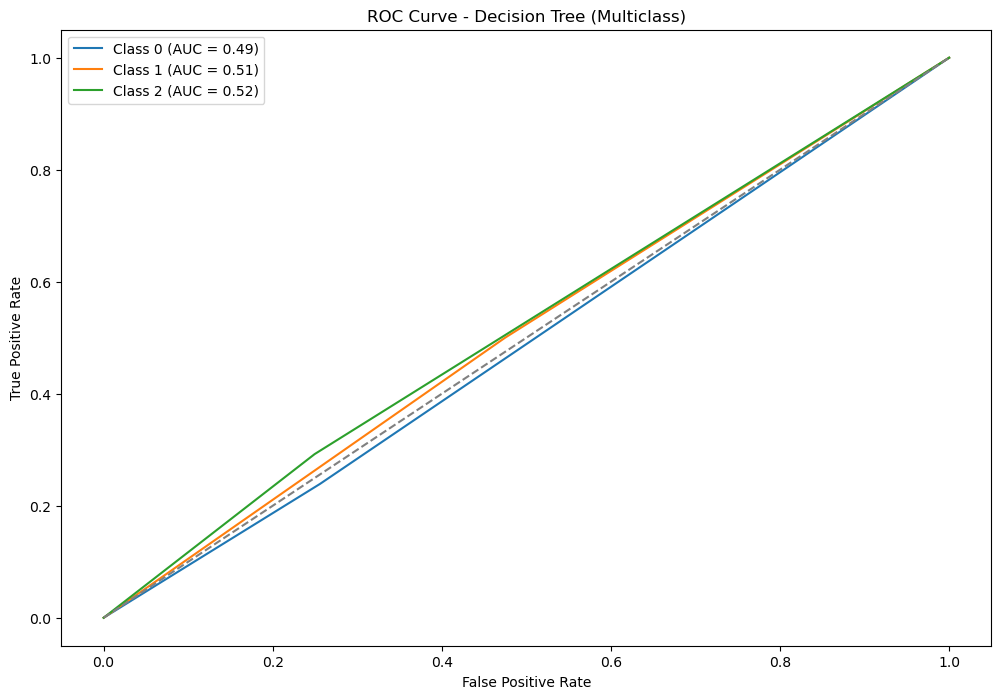

In [ ]:
# Binarizing the target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=decision_tree.classes_)
n_classes = y_test_bin.shape[1]

# Predicting probabilities
dt_proba = decision_tree.predict_proba(X_test)

# Ploting ROC curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], dt_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

# Ploting baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve - Decision Tree (Multiclass)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Generate the classification report
report = classification_report(y_test, dt_pred)
print("Classification Report for Decission Tree:\n", report)

Classification Report for Decission Tree:
               precision    recall  f1-score   support

         408       0.23      0.24      0.23       159
         415       0.51      0.50      0.50       330
         510       0.30      0.29      0.30       178

    accuracy                           0.38       667
   macro avg       0.34      0.34      0.34       667
weighted avg       0.38      0.38      0.38       667



# 3. random Forest Training

In [ ]:
# Training Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

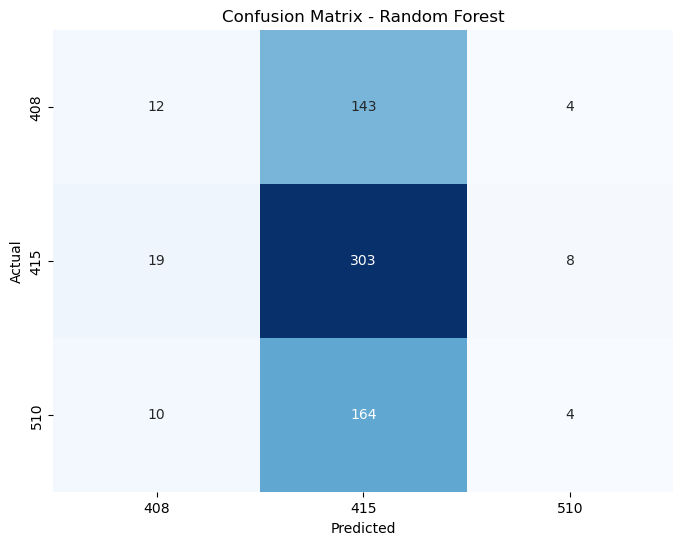

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=random_forest.classes_,
            yticklabels=random_forest.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

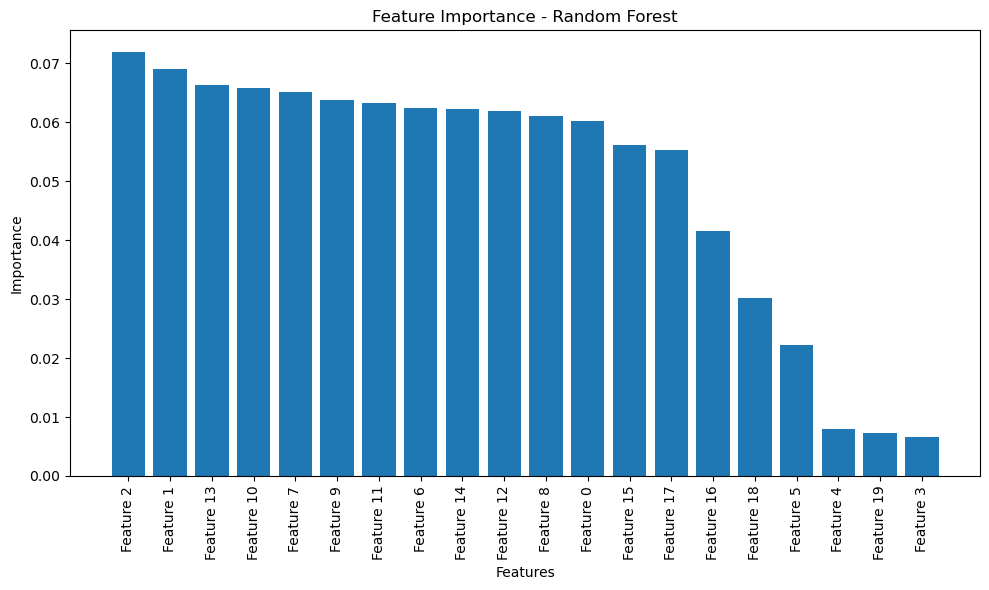

In [ ]:
# Feature Importance
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Generate the classification report
report = classification_report(y_test, rf_pred)
print("Classification Report for Random Forest:\n", report)

Classification Report for Random Forest:
               precision    recall  f1-score   support

         408       0.29      0.08      0.12       159
         415       0.50      0.92      0.64       330
         510       0.25      0.02      0.04       178

    accuracy                           0.48       667
   macro avg       0.35      0.34      0.27       667
weighted avg       0.38      0.48      0.36       667



# Making the predictions on the test sets

In [ ]:
# Making predictions on the test set
y_pred_forest = random_forest.predict(X_test)

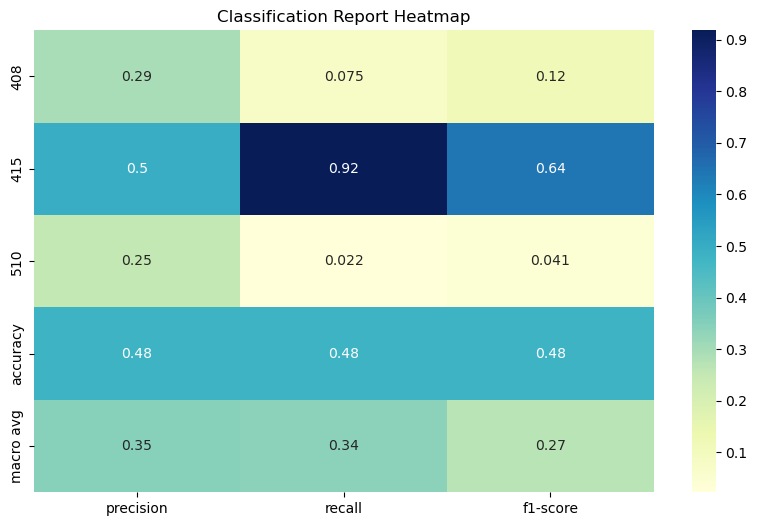

In [ ]:
#Classification Report as a Heatmap
# Generate classification report
report = classification_report(y_test, y_pred_forest, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title('Classification Report Heatmap')
plt.show()

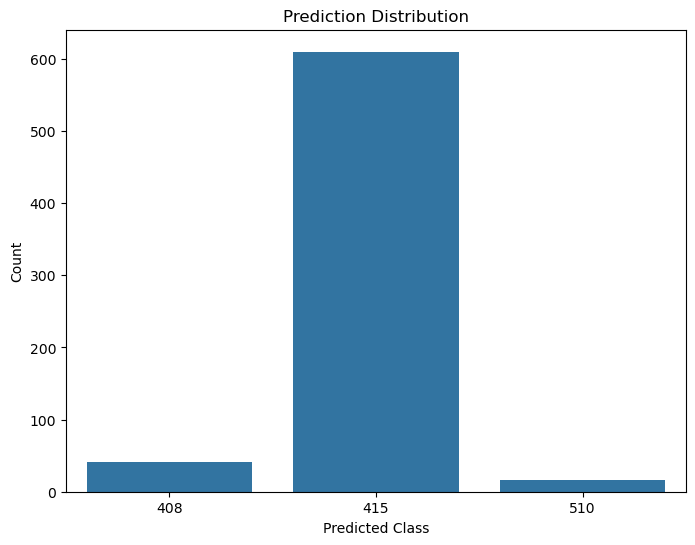

In [ ]:
# Counting occurrences of each class in predictions
unique, counts = np.unique(y_pred_forest, return_counts=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=unique, y=counts)
plt.title('Prediction Distribution')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

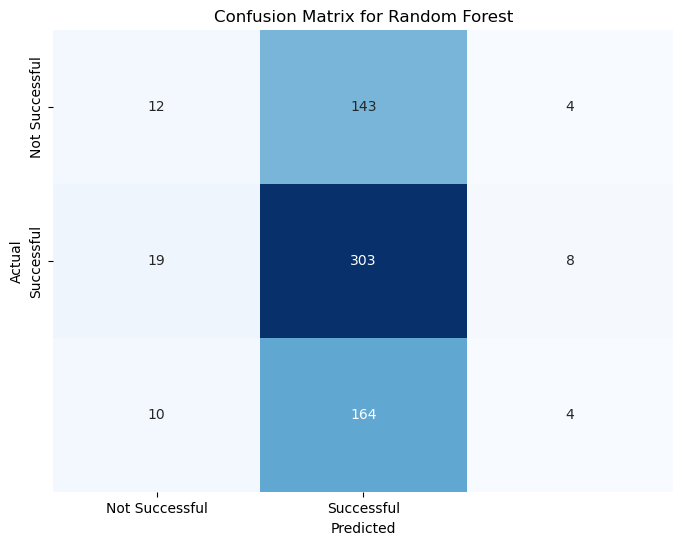

In [ ]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

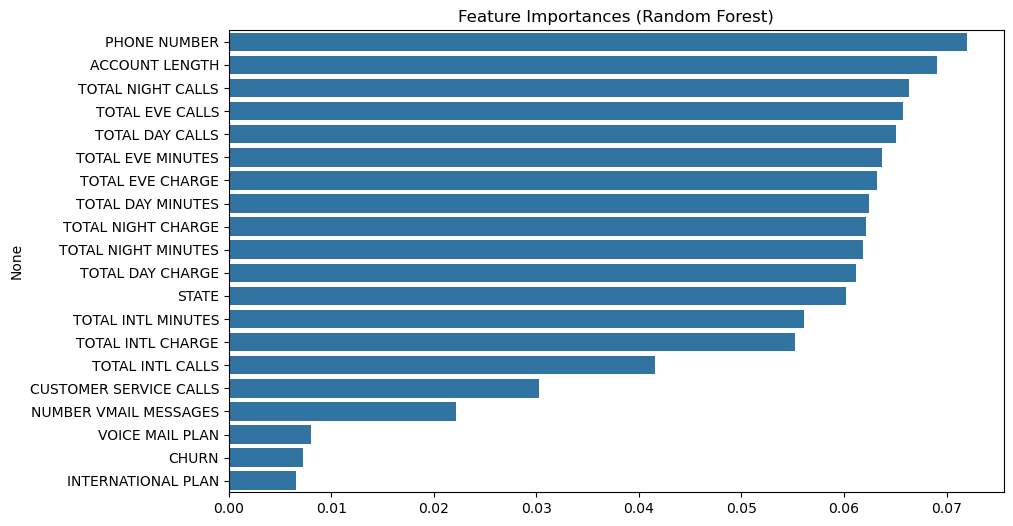

In [ ]:
# Feature Importance Visualization (for Random Forest)
if hasattr(random_forest, 'feature_importances_'):
    feature_importances = random_forest.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
    plt.title('Feature Importances (Random Forest)')
    plt.show()

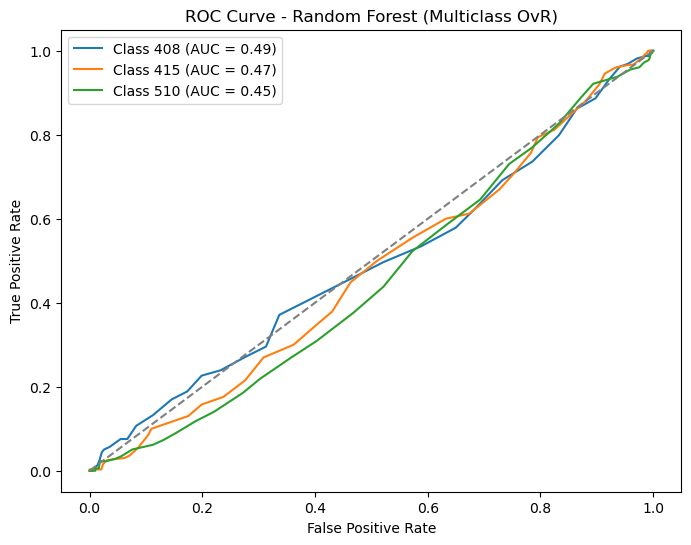

In [ ]:
# Binarizing the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=random_forest.classes_)

# Ploting ROC Curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(random_forest.classes_):
    y_pred_proba = random_forest.predict_proba(X_test)[:, i]
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba)
    auc_score = roc_auc_score(y_test_binarized[:, i], y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc_score:.2f})')

# Ploting baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Random Forest (Multiclass OvR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Calculate Feature Importance to
Extract feature importance from the trained model:e

In [ ]:
# Geting feature importances
importances = clf.feature_importances_

# Creating a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)

print(importance_df)

                   Feature  Importance
2             PHONE NUMBER    0.071984
1           ACCOUNT LENGTH    0.069040
13       TOTAL NIGHT CALLS    0.066300
10         TOTAL EVE CALLS    0.065794
7          TOTAL DAY CALLS    0.065083
9        TOTAL EVE MINUTES    0.063714
11        TOTAL EVE CHARGE    0.063189
6        TOTAL DAY MINUTES    0.062414
14      TOTAL NIGHT CHARGE    0.062189
12     TOTAL NIGHT MINUTES    0.061827
8         TOTAL DAY CHARGE    0.061127
0                    STATE    0.060169
15      TOTAL INTL MINUTES    0.056125
17       TOTAL INTL CHARGE    0.055229
16        TOTAL INTL CALLS    0.041578
18  CUSTOMER SERVICE CALLS    0.030238
5    NUMBER VMAIL MESSAGES    0.022143
4          VOICE MAIL PLAN    0.008032
19                   CHURN    0.007225
3       INTERNATIONAL PLAN    0.006600


## Using Permutation Importance ton provide additional insights into feature importance

                   Feature  Permutation Importance
1           ACCOUNT LENGTH                0.011094
7          TOTAL DAY CALLS                0.004498
11        TOTAL EVE CHARGE                0.004498
9        TOTAL EVE MINUTES                0.003598
5    NUMBER VMAIL MESSAGES                0.003448
3       INTERNATIONAL PLAN                0.002249
6        TOTAL DAY MINUTES                0.002099
10         TOTAL EVE CALLS                0.001499
8         TOTAL DAY CHARGE                0.001049
15      TOTAL INTL MINUTES                0.000750
19                   CHURN                0.000150
17       TOTAL INTL CHARGE               -0.000600
12     TOTAL NIGHT MINUTES               -0.001049
16        TOTAL INTL CALLS               -0.001199
2             PHONE NUMBER               -0.001799
14      TOTAL NIGHT CHARGE               -0.002249
13       TOTAL NIGHT CALLS               -0.002999
4          VOICE MAIL PLAN               -0.004648
18  CUSTOMER SERVICE CALLS     

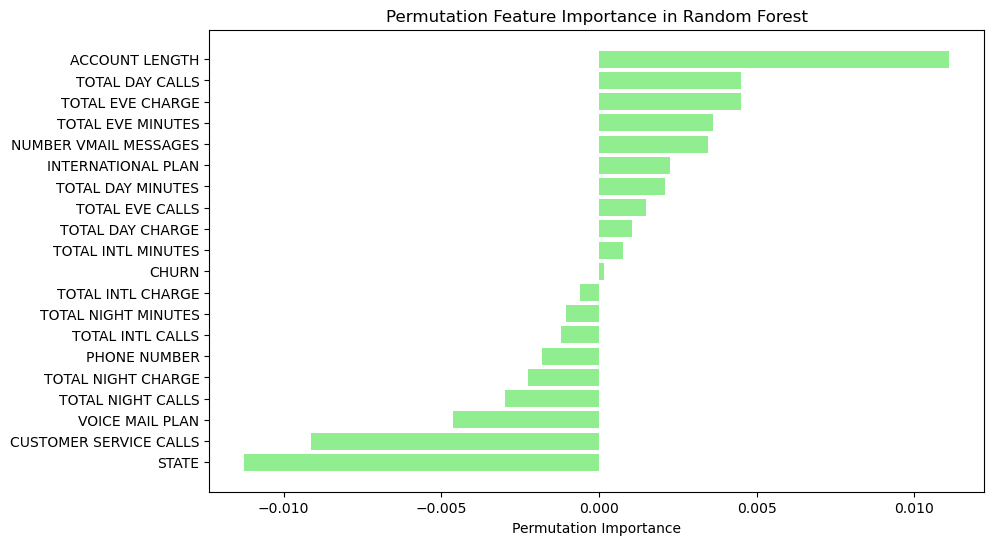

In [ ]:
from sklearn.inspection import permutation_importance

# Calculating permutation importance
perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

# Creating a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': perm_importance.importances_mean}).sort_values('Permutation Importance', ascending=False)

print(perm_importance_df)

# Ploting permutation importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Permutation Importance'], color='lightgreen')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Findings
- Best Model: Logistic Regression is the best model among the three based on the F1-score for class 415, despite its poor performance on classes 408 and 510. Justification is that it has the highest F1-score for class 415 (0.66), which is crucial if class 415 is the primary class of interest.
While it performs poorly on the other classes, the ability to perfectly recall class 415 (1.00) indicates that it can identify all instances of this class, which may be important depending on the business contex
- Feature Analysis; Account length is the most important features influencing the target variable to provide actionable insights for business.t.

# Recommendations
- The At-Risk Customers who are likely to churn should be out-reached in a personalised communication strategies e.g emails, special offers, or loyalty rewards to encourage them to stay, and also to Increase engagement with them through proactive customer support, so as to Address their concerns before they decide to leave.
-  Enhance Customer Experience i.e
  
Improve Onboarding Processe; by: Ensuinge that new customers have a smooth onboarding experienc thus. Provide tutorials, guides, and support to help them understand how to usether product effectively

Regular Feedback Lo; this is byps: Establish regular feedback mechanisms to understand custosmer satisfact either by u.  ofUse surveys or direct communication to gather insights on their experience and areas for improveme F

Feature Updates and Communic;this is bytioning Keep customers informed about new features and up, thusates. ingnsure they understand how these changes can benefit them, which can help in retaining their inte

-  Utilization of the Data-Driven Insights for Personalization i.e
Behavioral Segmentation: Segmeningt customers based on their behavior, such as purchase frequency, product usage, and engagement level, whichs allows for tailored marketing strategies that resonate with different customer groups.

Predictive Analytics for Offers: Use predictive analytics to determine the best time to offer discounts or promotions. For example, if a customer shows signs of reduced engagement, a timely discount could incentivize them to make a purchase.

Customer Journey Mappthis is by ing: Aingalyze the customer journey to identify critical touchpoints where customers may dise, hencegaging. Use this information to enhance those experiences and reduce c


- Optimizing Pricing and Value Proposition
Competitive Pricing Analysis: Regularly analyze competitor pricing and offerings. Ensure that your pricing strategy is competitive and reflects the value provided to customers.

Value Communication: Clearly communicate the value of your product or service. Highlight unique features and benefits that differentiate your offering from competitors.

Flexible Pricing Models: Consider offering flexible pricing options, such as tiered subscriptions or pay-as-you-go models, to cater to different customer needs and preferences.hurn.rest.